In [25]:
import import_src

from pybroker.agents import FeedForwardNeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
agent = FeedForwardNeuralNetwork()

In [27]:
num_random_observations_per_mutation = 1000
num_mutations = 5

# Store all outputs for analysis later. [[shape: (num_mutations, num_random_observations_per_mutation, 5)]]
all_outputs = []

# agent.forward() produces a vector with 5 elements. 

for mutation_index in range(num_mutations):

    # Generate random observations. Shape: (num_random_observations_per_mutation, observation_size)
    random_observations = np.random.rand(num_random_observations_per_mutation, 13)

    for observation_idx in range(num_random_observations_per_mutation):
        observation = random_observations[observation_idx]

        # Get the agent's output for the current observation
        output = agent.forward(observation)

        all_outputs.append(output)

    agent.mutate()

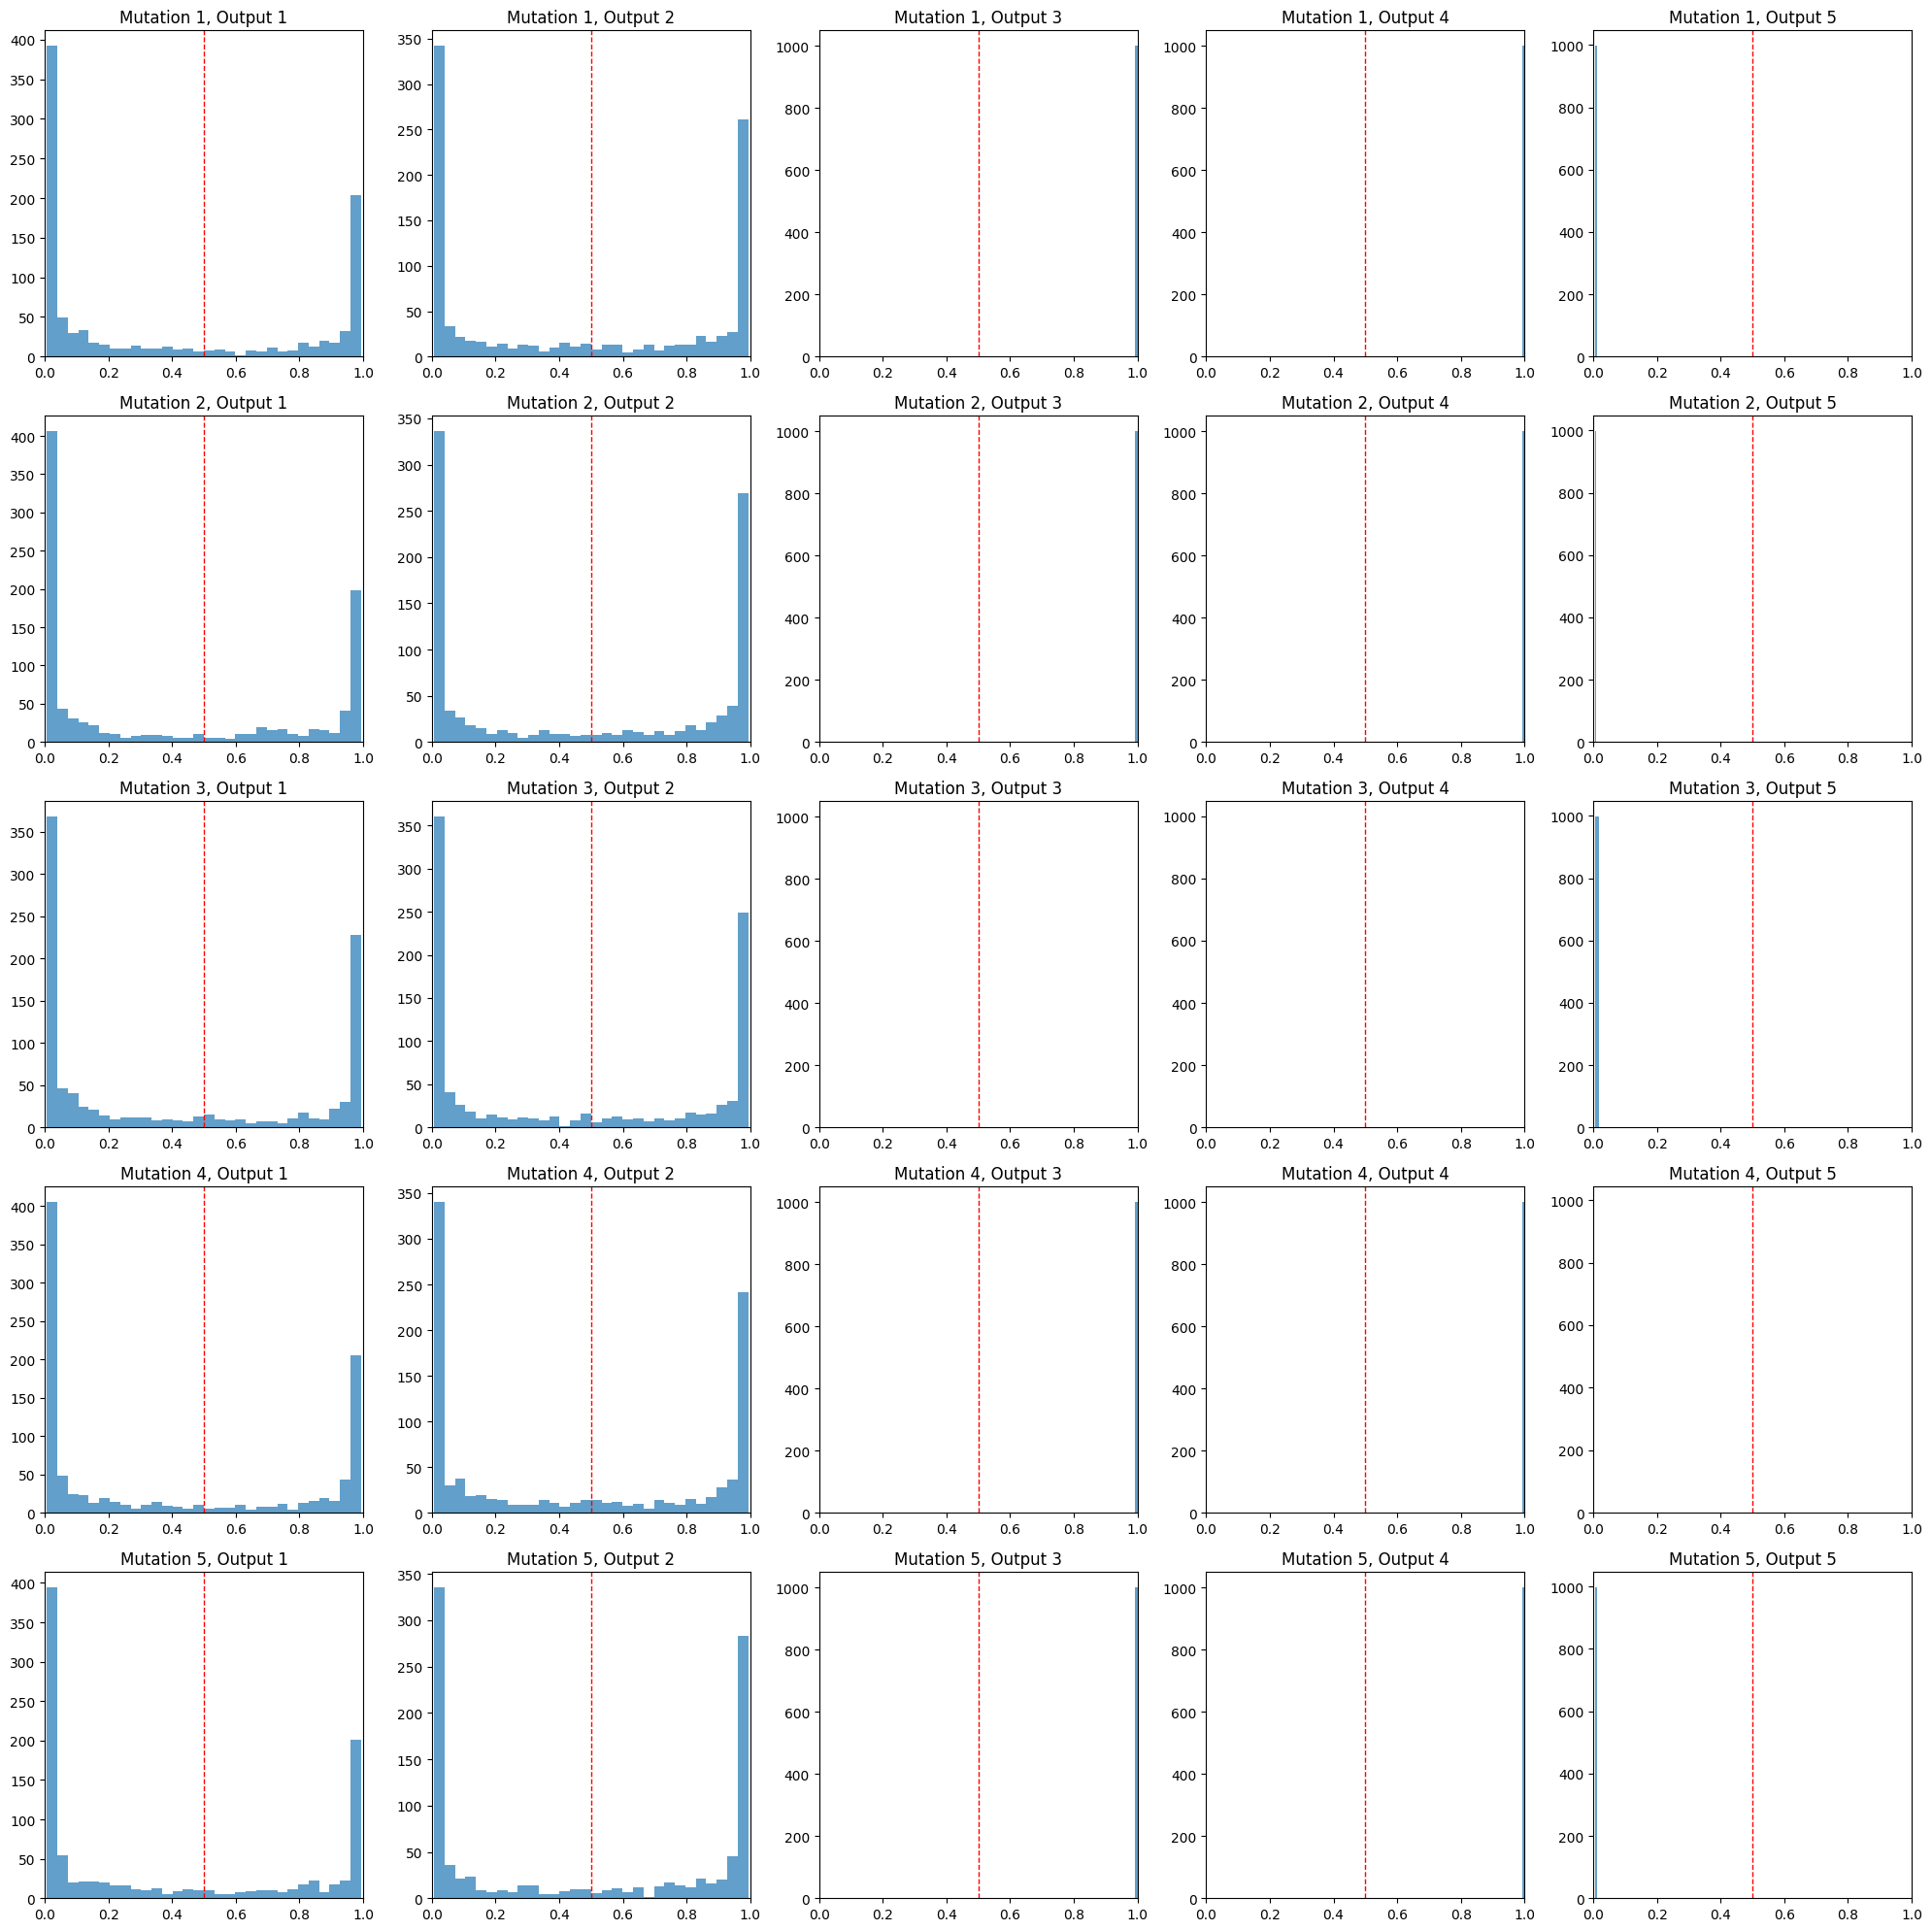

In [28]:
# Plot a grid of histograms showing the distribution of each output element across mutations.
all_outputs = np.array(all_outputs).reshape(num_mutations, num_random_observations_per_mutation, 5)
fig, axes = plt.subplots(num_mutations, 5, figsize=(20, 4 * num_mutations))
for mutation_index in range(num_mutations):
    for output_index in range(5):
        axes[mutation_index, output_index].hist(
            all_outputs[mutation_index, :, output_index], bins=30, alpha=0.7
        )
        axes[mutation_index, output_index].set_title(
            f"Mutation {mutation_index + 1}, Output {output_index + 1}"
        )

        # set x limits to 0-1
        axes[mutation_index, output_index].set_xlim(0, 1)

        # add vertical line at 0.5
        axes[mutation_index, output_index].axvline(0.5, color='red', linestyle='dashed', linewidth=1)

plt.tight_layout()
plt.show()